In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option("display.max_columns", 999)


## 1. Load and Inspect Data


In [3]:
# load the csv into a pd.Dataframe and show a preview of the first rows
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## 2. Data Cleaning & Wrangling

In [87]:
# Finding and counting missing values
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [88]:
# Remove all columns with more than ~ 30% missing values
drop_cols = list(null_cols[null_cols > 500].index)
df = df.drop(drop_cols, axis=1)

In [89]:
# Remove all records with missing values, need later for statistical analysis
df.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [90]:
# Select columns that you want to keep.
    # Since data volume is very large keeping only columns which drives the prices most (based on gut feeling)
df1 = df[['SalePrice', 'MSZoning','LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']]

In [91]:
# Sales Price needs to be normalized to square meters
df1['PriceSM'] = df1.SalePrice / df1.LotArea

<ipython-input-91-1ea43ff7a0e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PriceSM'] = df1.SalePrice / df1.LotArea


In [92]:
df1.head()

,SalePrice,MSZoning,LotFrontage,LotArea,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,ExterQual,ExterCond,HeatingQC,KitchenQual,PriceSM
0,208500,RL,65.0,8450,Reg,AllPub,7,5,2003,Gd,TA,Ex,Gd,24.674556
1,181500,RL,80.0,9600,Reg,AllPub,6,8,1976,TA,TA,Ex,TA,18.906250
2,223500,RL,68.0,11250,IR1,AllPub,7,5,2001,Gd,TA,Ex,Gd,19.866667
3,140000,RL,60.0,9550,IR1,AllPub,7,5,1915,TA,TA,Gd,Gd,14.659686
4,250000,RL,84.0,14260,IR1,AllPub,8,5,2000,Gd,TA,Ex,Gd,17.531557


In [93]:
# Converting categorical values to numvers for regression modell
df1.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [94]:
df1 = df1.replace(['Reg', 'IR1', 'IR2', 'IR3'], [4, 3, 2, 1])

In [95]:
df1.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [96]:
df1 = df1.replace(['AllPub', 'NoSeWa'], [2, 1])

In [97]:
df1.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [98]:
df1 = df1.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], ['5', '4', '3', '2', '1'])

In [99]:
df1.dropna()

,SalePrice,MSZoning,LotFrontage,LotArea,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,ExterQual,ExterCond,HeatingQC,KitchenQual,PriceSM
0,208500,RL,65.0,8450,4,2,7,5,2003,4,3,5,4,24.674556
1,181500,RL,80.0,9600,4,2,6,8,1976,3,3,5,3,18.906250
2,223500,RL,68.0,11250,3,2,7,5,2001,4,3,5,4,19.866667
3,140000,RL,60.0,9550,3,2,7,5,1915,3,3,4,4,14.659686
4,250000,RL,84.0,14260,3,2,8,5,2000,4,3,5,4,17.531557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,RL,62.0,7917,4,2,6,5,1999,3,3,5,3,22.104332
1456,210000,RL,85.0,13175,4,2,6,6,1978,3,3,3,3,15.939279
1457,266500,RL,66.0,9042,4,2,7,9,1941,5,4,5,4,29.473568
1458,142125,RL,68.0,9717,4,2,5,6,1950,3,3,4,4,14.626428


## 3. Linear Regression Modell

In [100]:
# Checking Correlation Matrix
df1.corr(method='pearson')

,SalePrice,LotFrontage,LotArea,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,PriceSM
SalePrice,1.000000,0.351799,0.263843,-0.267759,0.014314,0.790982,-0.077856,0.522897,0.273401
LotFrontage,0.351799,1.000000,0.426095,-0.231878,NaN,0.251646,-0.059213,0.123349,-0.392945
LotArea,0.263843,0.426095,1.000000,-0.315484,-0.010123,0.105806,-0.005636,0.014228,-0.329131
LotShape,-0.267759,-0.231878,-0.315484,1.000000,0.026616,-0.198994,0.033747,-0.229365,0.131127
Utilities,0.014314,NaN,-0.010123,0.026616,1.000000,0.001881,-0.009994,0.011505,0.024323
OverallQual,0.790982,0.251646,0.105806,-0.198994,0.001881,1.000000,-0.091932,0.572323,0.377578
OverallCond,-0.077856,-0.059213,-0.005636,0.033747,-0.009994,-0.091932,1.000000,-0.375983,-0.072174
YearBuilt,0.522897,0.123349,0.014228,-0.229365,0.011505,0.572323,-0.375983,1.000000,0.392159
PriceSM,0.273401,-0.392945,-0.329131,0.131127,0.024323,0.377578,-0.072174,0.392159,1.000000


In [101]:
# What is correlated most with price per square meter?
df1.corr(method='pearson')['PriceSM'].sort_values(ascending = False)

# Year Build is higher correlated than overall quality.

PriceSM        1.000000
YearBuilt      0.392159
OverallQual    0.377578
SalePrice      0.273401
LotShape       0.131127
Utilities      0.024323
OverallCond   -0.072174
LotArea       -0.329131
LotFrontage   -0.392945
Name: PriceSM, dtype: float64

In [102]:
# Assigning a constant
df1= df1.assign(const=1)

In [103]:
# Building the regression model
x = df1[["const", "YearBuilt"]]
y = df1["PriceSM"]
lr = sm.OLS(y, X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PriceSM   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           7.19e-55
Time:                        17:54:06   Log-Likelihood:                -5623.6
No. Observations:                1460   AIC:                         1.125e+04
Df Residuals:                    1458   BIC:                         1.126e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -295.9928     19.480    -15.195      0.000    -334.205    -257.781
YearBuilt      0.1608      0.010     16.278      0.000       0.141       0.180
==============================================================================
Omnibus:                      692.185   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3729.603
Skew:                           2.214   Prob(JB):                         0.00
Kurtosis:                       9.458   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# y = -295.9928 + 0.1608x

# For an increase per year, our price per quare meter increases by 0.1608

In [77]:
df1 = df1.assign(y_hat=lr.predict(df1[["const", "YearBuilt"]]))

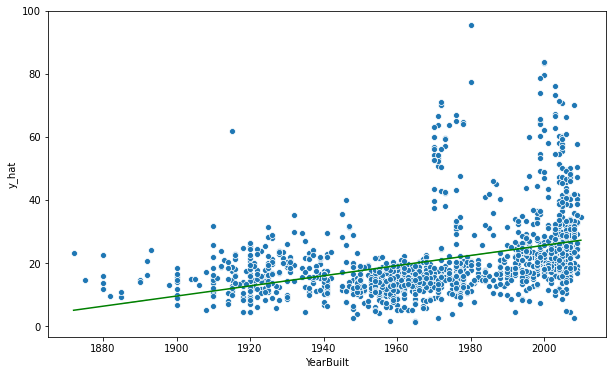

In [78]:
# Plotting the model with 
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df1,
                x="YearBuilt",
                y="PriceSM",
                ax=ax);

sns.lineplot(data=df1,
             x="YearBuilt",
             y="y_hat",
             color="green",
             ax=ax);